In [ ]:
# Install required libraries
# pip install yfinance scikit-learn pandas

import yfinance as yf  #This library is used to fetch historical market data from Yahoo Finance.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split#A function from scikit-learn for splitting datasets into training and testing sets.
from sklearn.ensemble import RandomForestRegressor#predict continuous values
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
# Function to get stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data


In [ ]:
# Function to preprocess data and extract features
def preprocess_data(data):
    data['Date'] = data.index
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data['Weekday'] = data['Date'].dt.weekday

    # Feature engineering (you can add more features based on your analysis)
    data['DailyReturn'] = data['Adj Close'].pct_change()#calculates the percentage change between the current and a prior element. it calculates the daily percentage change in the adjusted closing price.

    return data.dropna()


In [ ]:
# Function to train the model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model


In [ ]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse


In [ ]:
# Function to make predictions
def predict(model, input_data):
    return model.predict(input_data)


[*********************100%%**********************]  1 of 1 completed
Mean Squared Error on Test Set: 30.551954330364232
Predicted Stock Price: 203.91352951049805


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


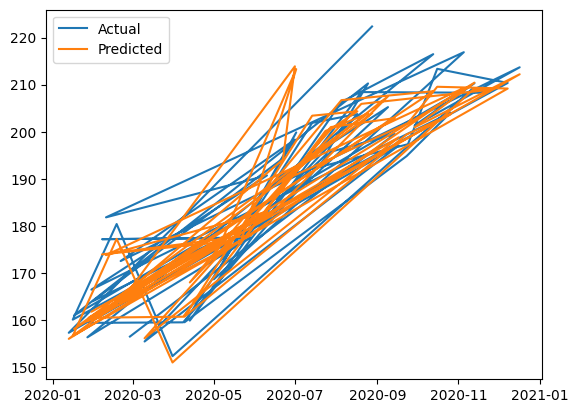

In [ ]:
# Example usage
ticker = 'MSFT'
start_date = '2020-01-01'
end_date = '2021-01-01'

# Get stock data
stock_data = get_stock_data(ticker, start_date, end_date)

# Preprocess data
processed_data = preprocess_data(stock_data)

# Define features and target
features = ['Year', 'Month', 'Day', 'Weekday', 'DailyReturn']
target = 'Adj Close'

X = processed_data[features]
y = processed_data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = train_model(X_train, y_train)

# Evaluate the model
mse = evaluate_model(model, X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

# Make predictions
input_data = X_test.iloc[0].values.reshape(1, -1)
prediction = predict(model, input_data)
print(f'Predicted Stock Price: {prediction[0]}')

# Plot actual vs predicted prices
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, model.predict(X_test), label='Predicted')
plt.legend()
plt.show()


In [ ]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse


# Evaluate the model
mse = evaluate_model(model, X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')



Mean Squared Error on Test Set: 30.551954330364232


In [ ]:
# Function to convert returns to binary labels
def classify_returns(returns, threshold=0):
    return (returns > threshold).astype(int)

# Function to evaluate classification accuracy
def calculate_accuracy(model, X_test, y_test, threshold=0):
    predictions = model.predict(X_test)
    binary_predictions = classify_returns(predictions, threshold)
    binary_labels = classify_returns(y_test, threshold)

    accuracy = sum(binary_predictions == binary_labels) / len(binary_labels)
    return accuracy


# Example usage
threshold = 0.01  # Adjust the threshold as needed

# Make predictions
input_data = X_test.iloc[0].values.reshape(1, -1)
prediction = predict(model, input_data)

# Calculate accuracy
accuracy = calculate_accuracy(model, X_test, y_test, threshold)
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')


Accuracy on Test Set: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# ...

# Example usage with user input
user_ticker = input("Enter the stock symbol (e.g., AAPL): ")
start_date = '2020-01-01'
end_date = '2021-01-01'

# Get stock data
user_stock_data = get_stock_data(user_ticker, start_date, end_date)

# Preprocess data
user_processed_data = preprocess_data(user_stock_data)

# Select the last row as an example for prediction
input_data = user_processed_data.iloc[-1][features].values.reshape(1, -1)

# Make predictions
prediction = predict(model, input_data)
print(f'Predicted Stock Price for {user_ticker}: {prediction[0]}')

# ...


[*********************100%%**********************]  1 of 1 completed
Predicted Stock Price for GOOG: 216.45161361694335


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
